<a href="https://colab.research.google.com/github/jeqcho/reproduce-faculty-gender-ratings/blob/main/course_ratings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


pd.options.display.max_columns = None
df = pd.read_csv('verbose_course_ratings.csv')
df.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score,course_id
count,1238.000000,1238.000000,1238.00000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.0,1238.0,1238.000000,1238.000000,1238.000000,1238.000000,788.000000
mean,29.853796,36.966074,4.27500,4.451535,4.518578,0.722349,4.551276,4.732633,4.757674,0.524018,6.214814,5.717286,6.337641,2.825905,4.235420,4.424879,4.491922,0.769564,0.619857,0.705328,0.510334,0.267551,0.008280,0.0,0.0,-0.022843,0.916477,-0.198641,0.079662,144332.848985
std,53.273964,63.212698,0.56744,0.699400,0.791565,0.343061,0.505493,0.560778,0.649172,0.396361,2.881240,2.808788,3.858121,1.530298,0.584697,0.711673,0.804906,0.358230,0.205034,0.222829,0.432827,0.335849,0.034694,0.0,0.0,0.245538,0.156850,0.305963,0.256473,39189.543517
min,5.000000,5.000000,2.00000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,-1.000000,2.000000,1.000000,1.000000,0.000000,-0.340000,-0.340000,-0.974500,-1.000000,-0.083333,0.0,0.0,-1.000000,0.000000,-0.987400,0.000000,107368.000000
25%,9.000000,11.000000,3.96000,4.000000,4.000000,0.472582,4.370000,5.000000,5.000000,0.260489,4.162500,4.000000,4.000000,1.725000,3.890000,4.000000,4.000000,0.520000,0.491075,0.600525,0.000000,0.177651,0.000000,0.0,0.0,0.000000,0.928675,-0.357000,0.000000,116353.000000
50%,13.000000,16.000000,4.38000,5.000000,5.000000,0.752840,4.700000,5.000000,5.000000,0.492366,5.800000,5.000000,5.000000,2.475000,4.380000,5.000000,5.000000,0.790000,0.652075,0.763975,0.656100,0.335761,0.000000,0.0,0.0,0.000000,0.969850,0.000000,0.000000,123964.000000
75%,28.000000,34.000000,4.72750,5.000000,5.000000,0.982922,4.920000,5.000000,5.000000,0.807576,7.620000,7.000000,8.000000,3.550000,4.677500,5.000000,5.000000,1.030000,0.776402,0.879550,0.905575,0.440526,0.000000,0.0,0.0,0.000000,0.986300,0.000000,0.000000,160084.250000
max,568.000000,659.000000,5.00000,5.000000,5.000000,1.632993,5.000000,5.000000,5.000000,1.969464,21.570000,21.500000,30.000000,10.270000,5.000000,5.000000,5.000000,2.070000,0.988550,0.988550,0.997900,0.829490,0.333333,0.0,0.0,0.577350,0.999400,0.000000,0.998600,221779.000000


In [ ]:
df.dtypes

course_code                object
course_title               object
course_teacher             object
link                       object
fas_code                   object
unique_code                object
num_responded             float64
num_students              float64
course_score_mean         float64
course_score_median       float64
course_score_mode         float64
course_score_stdev        float64
lecturer_score_mean       float64
lecturer_score_median     float64
lecturer_score_mode       float64
lecturer_score_stdev      float64
workload_score_mean       float64
workload_score_median     float64
workload_score_mode       float64
workload_score_stdev      float64
rec_score_mean            float64
rec_score_median          float64
rec_score_mode            float64
rec_score_stdev           float64
sentiment_score_mean      float64
sentiment_score_median    float64
sentiment_score_mode      float64
sentiment_score_stdev     float64
gem_score_mean            float64
gem_score_medi

In [ ]:
df['course_id']

0            NaN
1            NaN
2       122910.0
3       122910.0
4            NaN
          ...   
1257    120380.0
1258    125089.0
1259    142838.0
1260    218612.0
1261    220642.0
Name: course_id, Length: 1262, dtype: float64

In [ ]:
df['course_id'].fillna(-1,inplace=True)
df['course_id'] = df['course_id'].astype(int).astype(str)

In [ ]:
df['course_identifier'] = df['course_code'] + ' ' + df['course_title']
df = df.drop_duplicates(subset='course_identifier', keep="first")

In [ ]:
df.nlargest(5,'sentiment_score_mean')

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier
966,MOD-HEB BB,Elementary Modern Hebrew II 001,Irit Aharony,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-159988-2222-1-1-001,FAS-159988-2222-1-1-001(Irit Aharony),7.0,9.0,4.57,5.0,5.0,0.497570,5.00,5.0,5.0,0.000000,8.17,7.0,12.0,3.13,4.71,5.0,5.0,0.76,0.988550,0.98855,0.9907,0.003041,0.0,0.0,0.0,0.0,This class was probably my favorite at Harvard...,0.9907,NaN,0.0,NaN,0.0,159988,For Undergraduate and Graduate Students,Near Eastern Languages & Civ,Modern Hebrew,NaN,None,NaN,Lecture,Elementary Modern Hebrew II,MOD-HEB BB Elementary Modern Hebrew II 001
292,ECON 2070,A Computer Science Toolbox for Modern Economic...,Yannai Gonczarowski,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-219636-2222-1-1-001,FAS-219636-2222-1-1-001(Yannai Gonczarowski),6.0,10.0,4.33,4.5,5.0,0.752840,4.50,4.5,4.0,0.502519,4.00,4.0,5.0,1.55,4.33,4.5,5.0,0.82,0.972700,0.97270,0.9727,-1.000000,0.0,0.0,0.0,-1.0,A fun course: this was Yannai's first time tea...,0.9727,NaN,0.0,NaN,0.0,219636,Primarily for Graduate Students,Economics,Economics,NaN,Science & Engineering & Applied Science,NaN,Lecture,A Computer Science Toolbox for Modern Economic...,ECON 2070 A Computer Science Toolbox for Moder...
1079,PSY 1325,"The Emotional, Social Brain 001",Elizabeth Phelps,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-216792-2222-1-1-001,FAS-216792-2222-1-1-001(Elizabeth Phelps),12.0,16.0,4.50,5.0,5.0,0.674200,4.70,5.0,5.0,0.460566,3.20,3.0,4.0,1.03,4.60,5.0,5.0,0.52,0.966767,0.96420,0.9728,0.005244,0.0,0.0,0.0,0.0,This is a wonderful course with applicable top...,0.9728,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"PSY 1325 The Emotional, Social Brain 001"
972,TURKISH AB,Elementary Modern Turkish II 001,Meryem Demir,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-159868-2222-1-1-001,FAS-159868-2222-1-1-001(Meryem Demir),6.0,6.0,4.83,5.0,5.0,0.377525,4.83,5.0,5.0,0.377525,8.80,10.0,10.0,2.17,4.67,5.0,5.0,0.52,0.963500,0.96350,0.9330,0.043134,0.0,0.0,0.0,0.0,THIS CLASS IS AWESOME! Please please take this...,0.9940,NaN,0.0,NaN,0.0,159868,Primarily for Undergraduate Students,Near Eastern Languages & Civ,Turkish,NaN,None,NaN,Lecture,Elementary Modern Turkish II,TURKISH AB Elementary Modern Turkish II 001
786,MATH 230B,Semi-Riemannian Geometry 001,Puskar Mondal,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-137727-2222-1-1-001,FAS-137727-2222-1-1-001(Puskar Mondal),5.0,10.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.00,5.00,5.0,5.0,0.00,0.961500,0.96150,0.9615,-1.000000,0.0,0.0,0.0,-1.0,"This class was the highlight of my semester, a...",0.9615,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATH 230B Semi-Riemannian Geometry 001


In [ ]:
dftest = df.sample(20)
dftest.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.00000,20.000000,20.000000
mean,32.350000,40.050000,4.539000,4.750000,4.85000,0.579576,4.645500,4.850000,4.900000,0.510296,5.703500,5.100000,5.900000,2.704000,4.524000,4.625000,4.75000,0.558000,0.644217,0.696253,0.524835,0.223848,0.023473,0.0,0.0,0.023177,0.89882,-0.078085,0.215720
std,78.156574,94.543488,0.399406,0.444262,0.48936,0.396982,0.366972,0.366348,0.447214,0.406573,2.367077,2.137387,3.093286,1.642509,0.436377,0.582079,0.55012,0.395602,0.190806,0.232628,0.408107,0.319822,0.048123,0.0,0.0,0.276247,0.18146,0.180781,0.389549
min,5.000000,6.000000,3.780000,4.000000,3.00000,0.000000,3.880000,4.000000,3.000000,0.000000,1.800000,2.000000,2.000000,0.450000,3.440000,3.000000,3.00000,0.000000,0.189700,0.113150,-0.271600,-1.000000,0.000000,0.0,0.0,-1.000000,0.22630,-0.682300,0.000000
25%,6.000000,9.750000,4.250000,4.750000,5.00000,0.348735,4.445000,5.000000,5.000000,0.264954,4.200000,3.875000,4.500000,1.632500,4.237500,4.000000,5.00000,0.352500,0.553081,0.607487,0.140125,0.144903,0.000000,0.0,0.0,0.000000,0.92675,-0.017900,0.000000
50%,12.000000,15.500000,4.635000,5.000000,5.00000,0.493339,4.785000,5.000000,5.000000,0.447191,5.930000,5.000000,5.500000,2.300000,4.620000,5.000000,5.00000,0.615000,0.690151,0.801200,0.705850,0.314571,0.000000,0.0,0.0,0.000000,0.96400,0.000000,0.000000
75%,16.250000,19.250000,4.860000,5.000000,5.00000,0.793262,4.922500,5.000000,5.000000,0.808186,6.820000,6.000000,6.250000,3.375000,4.820000,5.000000,5.00000,0.767500,0.786164,0.839975,0.864225,0.388326,0.007576,0.0,0.0,0.043018,0.98850,0.000000,0.149575
max,357.000000,433.000000,5.000000,5.000000,5.00000,1.556998,5.000000,5.000000,5.000000,1.556998,13.000000,12.000000,16.000000,6.770000,5.000000,5.000000,5.00000,1.300000,0.873840,0.923000,0.984900,0.473442,0.166667,0.0,0.0,0.408248,0.99700,0.000000,0.976700


In [ ]:
import re
from nltk import tokenize
import nltk
nltk.download('punkt')

df['best_gem_comment'].fillna('',inplace=True)

def get_short_gem_comment(comment):
  if comment == '':
    return ''
  for sentence in tokenize.sent_tokenize(comment):
    if re.search(r'\bgem\b',sentence.lower()):
      return sentence
  assert False


df['best_gem_comment_short'] = df['best_gem_comment'].apply(get_short_gem_comment)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['course_title_2023'].fillna('',inplace=True)

def get_useful_title(row):
  if row['course_code'].startswith('EXPOS 20'):
    return row['course_title']
  # somehow my.harvard gives an error if the title starts with a single word
  # followed by a colon
  return row['course_title_2023'].replace(':','')


df['useful_title'] = df.apply (lambda row: get_useful_title(row), axis=1)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['best_comment'].fillna('',inplace=True)

def get_short_comment(comment):
  if comment == '':
    return ''
  max_score = 0
  best_short_comment = ''
  for sentence in tokenize.sent_tokenize(comment):
    score = sia.polarity_scores(sentence)['compound']
    if score > max_score:
      max_score = score
      best_short_comment = sentence
  return best_short_comment


df['best_comment_short'] = df['best_comment'].apply(get_short_comment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_first_sentece(comment):
  if comment == '':
    return ''
  return tokenize.sent_tokenize(comment)[0]


df['best_comment_first'] = df['best_comment'].apply(get_first_sentece)

In [ ]:
!pip install xlsxwriter
df.to_excel("verbose_course_ratings", engine='xlsxwriter')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 9.5 MB/s eta 0:00:00


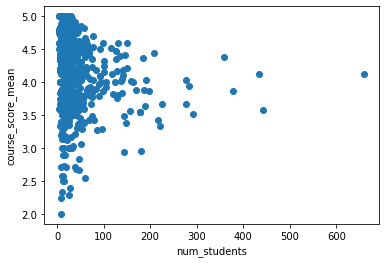

In [ ]:
plt.scatter(df['num_students'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('num_students')
plt.ylabel('course_score_mean')
plt.gca().set_facecolor('white')
# Show the plot
plt.show()

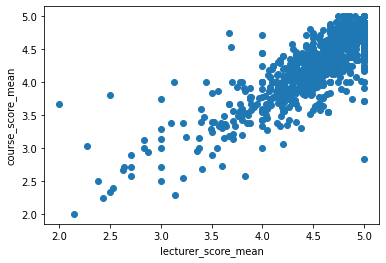

In [ ]:
plt.scatter(df['lecturer_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

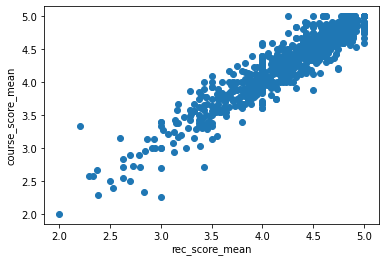

In [ ]:
plt.scatter(df['rec_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('rec_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

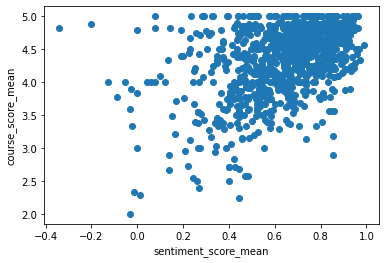

In [ ]:
plt.scatter(df['sentiment_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('sentiment_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

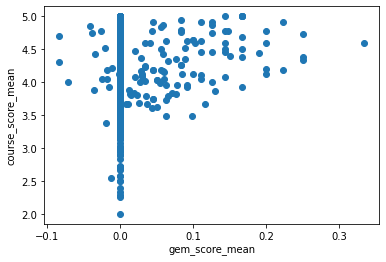

In [ ]:
plt.scatter(df['gem_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

107


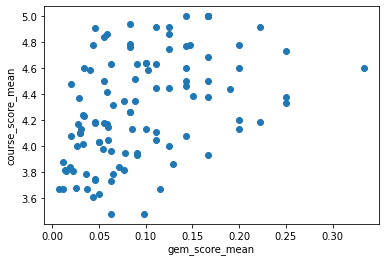

In [ ]:
df_course_gem = df[df['gem_score_mean'] > 0]
df_course_gem = df_course_gem[df_course_gem['gem_score_mean'] < 1]
print(len(df_course_gem))
plt.scatter(df_course_gem['gem_score_mean'], df_course_gem['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

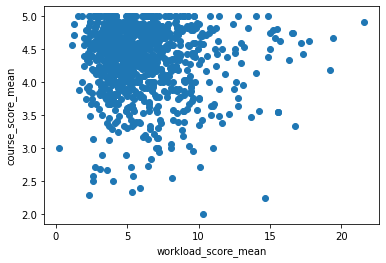

In [ ]:
plt.scatter(df['workload_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

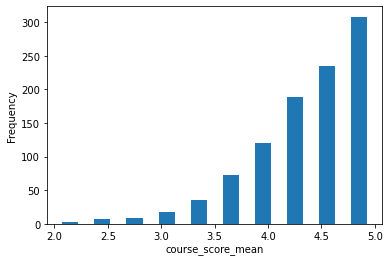

In [ ]:
plt.hist(df['course_score_mean'], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

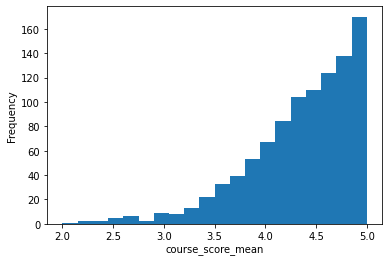

In [ ]:
plt.hist(df['course_score_mean'],bins=20)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

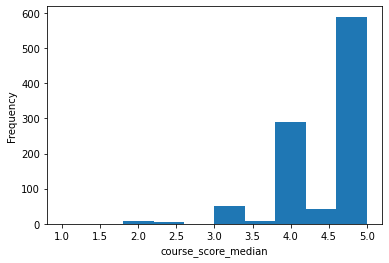

In [ ]:
plt.hist(df['course_score_median'])

# Add x-axis and y-axis labels
plt.xlabel('course_score_median')
plt.ylabel('Frequency')

# Show the plot
plt.show()

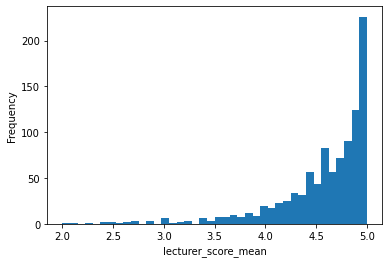

In [ ]:
plt.hist(df['lecturer_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

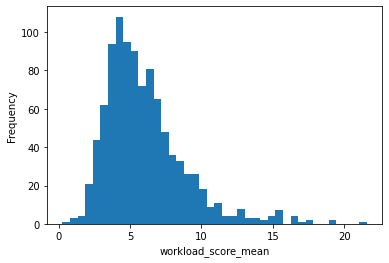

In [ ]:
plt.hist(df['workload_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df['num_students'].describe()

count    992.000000
mean      29.503024
std       47.678731
min        5.000000
25%       10.000000
50%       15.000000
75%       27.000000
max      659.000000
Name: num_students, dtype: float64

In [ ]:
import numpy

df_super_gem = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] > 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
]

print(len(df_super_gem))
df_super_gem = df_super_gem.sort_values(by=['gem_score_mean'],ascending=False)
df_super_gem

30


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
859,MICROBI 213,Social Issues in Biology 001,Richard Born,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-122708-2222-1-1-001,FAS-122708-2222-1-1-001(Richard Born),10.0,10.0,4.60,5.0,5.0,0.666667,5.00,5.0,5.0,0.000000,2.50,2.5,3.0,1.18,4.60,5.0,5.0,0.52,0.891100,0.95010,0.7655,0.108839,0.333333,0.0,0.0,0.577350,This is an awesome class for anyone interested...,0.9577,NaN,0.0000,This is an awesome class for anyone interested...,0.9577,122708,Primarily for Graduate Students,Medical Sciences,Microbiology,NaN,None,NaN,Seminar,Social Issues in Biology,MICROBI 213 Social Issues in Biology 001,Highly recommend—this is a gem in the best sen...,Social Issues in Biology,This is an awesome class for anyone interested...,This is an awesome class for anyone interested...
420,EXPOS 20,Expository Writing 20 227,David Nee,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2222-1-1-227,FAS-116353-2222-1-1-227(David Nee),14.0,15.0,4.38,5.0,5.0,0.936499,4.85,5.0,5.0,0.358870,6.67,6.0,10.0,2.77,4.55,5.0,5.0,0.82,0.850525,0.88575,0.9979,0.169259,0.250000,0.0,0.0,0.500000,This is a great Expos and I would highly recom...,0.9979,NaN,0.0000,This expos is an highly underrated gem! Take i...,0.8012,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 227,This expos is an highly underrated gem!,Expository Writing 20 227,"David gives great feedback on the essays, and ...",This is a great Expos and I would highly recom...
431,EXPOS 20,Expository Writing 20 238,Sparsha Saha,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2222-1-1-238,FAS-116353-2222-1-1-238(Sparsha Saha),13.0,15.0,4.73,5.0,5.0,0.617178,4.83,5.0,5.0,0.377525,5.82,5.0,5.0,2.09,4.83,5.0,5.0,0.39,0.891863,0.92495,0.9902,0.125179,0.250000,0.0,0.0,0.462910,I would ABSOLUTELY TAKE THIS EXPOS if you can!...,0.9902,NaN,0.0000,This class is an absolute GEM! Animal rights a...,0.9553,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 238,This class is an absolute GEM!,Expository Writing 20 238,Sparsha is one of the most wonderful professor...,I would ABSOLUTELY TAKE THIS EXPOS if you can!!!
481,EXPOS 40,Public Speaking Practicum 004,Katharine Clarke,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-125227-2222-1-1-004,FAS-125227-2222-1-1-004(Katharine Clarke),14.0,14.0,4.92,5.0,5.0,0.272660,5.00,5.0,5.0,0.000000,3.67,3.5,5.0,1.37,4.92,5.0,5.0,0.28,0.760322,0.87720,0.9562,0.316510,0.222222,0.0,0.0,0.440959,Please take this course!!!! This is by far the...,0.9876,NaN,0.0000,Please take this course with Kate if you can. ...,0.8772,125227,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Lecture,Public Speaking Practicum,EXPOS 40 Public Speaking Practicum 004,You will learn a lot and Kate is simply the be...,Public Speaking Practicum,Every single thing you do in the class is so f...,Please take this course!!!!
630,GOV 1759,Behavioral Insights and Public Policy: Nudging...,Michael Hiscox,https://harvard.bluera.com/harvard

In [ ]:
df_super_gem = df_super_gem[df_super_gem['course_code'] != 'EXPOS 20']
df_super_gem

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2023,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
859,MICROBI 213,Social Issues in Biology 001,Richard Born,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-122708-2222-1-1-001,FAS-122708-2222-1-1-001(Richard Born),10.0,10.0,4.60,5.0,5.0,0.666667,5.00,5.0,5.0,0.000000,2.50,2.5,3.0,1.18,4.60,5.0,5.0,0.52,0.891100,0.95010,0.7655,0.108839,0.333333,0.0,0.0,0.577350,This is an awesome class for anyone interested...,0.9577,NaN,0.0000,This is an awesome class for anyone interested...,0.9577,122708,Primarily for Graduate Students,Medical Sciences,Microbiology,NaN,None,NaN,Seminar,Social Issues in Biology,MICROBI 213 Social Issues in Biology 001,Highly recommend—this is a gem in the best sen...,Social Issues in Biology,This is an awesome class for anyone interested...,This is an awesome class for anyone interested...
481,EXPOS 40,Public Speaking Practicum 004,Katharine Clarke,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-125227-2222-1-1-004,FAS-125227-2222-1-1-004(Katharine Clarke),14.0,14.0,4.92,5.0,5.0,0.272660,5.00,5.0,5.0,0.000000,3.67,3.5,5.0,1.37,4.92,5.0,5.0,0.28,0.760322,0.87720,0.9562,0.316510,0.222222,0.0,0.0,0.440959,Please take this course!!!! This is by far the...,0.9876,NaN,0.0000,Please take this course with Kate if you can. ...,0.8772,125227,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Lecture,Public Speaking Practicum,EXPOS 40 Public Speaking Practicum 004,You will learn a lot and Kate is simply the be...,Public Speaking Practicum,Every single thing you do in the class is so f...,Please take this course!!!!
630,GOV 1759,Behavioral Insights and Public Policy: Nudging...,Michael Hiscox,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-204958-2222-1-1-001,FAS-204958-2222-1-1-001(Michael Hiscox),173.0,209.0,4.44,5.0,5.0,0.824036,4.74,5.0,5.0,0.563757,2.28,2.0,2.0,1.47,4.60,5.0,5.0,0.76,0.661598,0.76530,0.4019,0.335220,0.190476,0.0,0.0,0.395035,This course is fascinating. It gives you the t...,0.9935,This class is the definition of a gem––there's...,-0.7363,THIS CLASS IS A GEM! Really love the material ...,0.9783,204958,For Undergraduate and Graduate Students,Government,Government,NaN,Social Sciences,NaN,Lecture,Behavioral Insights and Public Policy: Nudging...,GOV 1759 Behavioral Insights and Public Policy...,THIS CLASS IS A GEM!,Behavioral Insights and Public Policy Nudging ...,"But before that, it was great fun to listen to...",This course is fascinating.
552,GENED 1110,Classical Mythology: Myth in Antiquity and Tod...,Brigitte Libby,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126004-2222-1-1-001,FAS-126004-2222-1-1-001(Brigitte Libby),286.0,358.0,4.39,5.0,5.0,0.752101,4.76,5.0,5.0,0.572817,3.11,3.0,2.0,1.71,4.50,5.0,5.0,0.74,0.639459,0.81140,0.0000,0.405043,0.150407,0.0,0.0,0.367395,I walked in with minimal background in mytholo...,0.9867,The class is fantastic but many of the narrati...,-0.8170,This class is great and exactly as advertised ...,0.9844,126004,Primarily for Undergraduate Students,General Education,General Education,NaN,None,Aesthetics and Culture,Lecture,Classical Mythology: Myth in Antiquity and Today,GENED 1110 Classical Mythology: Myth in Antiqu...,Professor Libby is a gem

In [ ]:
df_super_gem[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
]].to_json('super_gems.json',orient='records')

In [ ]:
department_list = [x for x in df['department'].unique() if str(x)!='nan']
department_list.sort()
department_list

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Bio Sciences in Public Health',
 'Biomedical Engineering',
 'Biophysics',
 'Biostatistics',
 'Chemical & Physical Biology',
 'Chemical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Comparative Literature',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Envi Science & Public Policy',
 'Environmental Sci & Engineer',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'Folklore & Mythology',
 'Freshman Seminars',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematic

In [ ]:
def get_gems_of_department(department):
  df_gem_of_department = df[
     (df['department'] == department)
  & (df['gem_score_mean'] > 0)
  & (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
  & (df['workload_score_mean'] < 7)
  & (df['course_id'] != '-1')
  ]

  df_gem_of_department = df_gem_of_department.sort_values(by=['gem_score_mean'],ascending=False).head(5)
  df_gem_of_department[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
  ]].to_json('departments/'+department+'.json',orient='records')

In [ ]:
for department in department_list:
  get_gems_of_department(department)

FileNotFoundError: ignored

In [ ]:
!zip -r /content/departments.zip /content/departments

In [ ]:
from google.colab import files
files.download("/content/departments.zip")

In [ ]:
df[df['department'] == 'Expository Writing']

In [ ]:
print(len(df[df['course_id']!='-1']))

In [ ]:
print(len(df[
    (df['course_id']!='-1')
    &(df['gem_score_mean']>0)
]))

In [ ]:
df_great_courses = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] == 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
]

print(len(df_great_courses))
df_great_courses = df_great_courses.sort_values(by=['sentiment_score_mean'],ascending=False)

df_great_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('great_courses.json',orient='records')
df_great_courses

In [ ]:
df_near_gems = df_great_courses[df_great_courses['workload_score_mean']<7]
print(len(df_near_gems))
df_near_gems

In [ ]:
df_legendary_courses = df[(df['course_score_mean'] == 5)
& (df['lecturer_score_mean'] == 5)
& (df['rec_score_mean'] == 5)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['gem_score_mean'] == 0)
]

print(len(df_legendary_courses))
df_legendary_courses = df_legendary_courses.sort_values(by=['workload_score_mean'],ascending=True)
df_legendary_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment_first',
    'best_comment_short',
    'course_id',
    'link'
  ]].to_json('legendary_courses.json',orient='records')
df_legendary_courses